In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
stock_data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
stock_data

C:\Users\jbasn\AppData\Local\Temp\ipykernel_9848\2080489352.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211205,128.954553,122.324579,128.343772,112117500
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600
2023-01-05,123.161934,125.871063,122.905803,125.240575,80962700
2023-01-06,127.693581,128.353621,123.033882,124.137239,87754700
2023-01-09,128.215714,131.427273,127.959583,128.530965,70790800
...,...,...,...,...,...
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300


In [3]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211205,128.954553,122.324579,128.343772,112117500
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600
2023-01-05,123.161934,125.871063,122.905803,125.240575,80962700
2023-01-06,127.693581,128.353621,123.033882,124.137239,87754700
2023-01-09,128.215714,131.427273,127.959583,128.530965,70790800


In [4]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700
2023-12-28,191.768951,192.838849,191.362784,192.323710,34049900
2023-12-29,190.728775,192.581275,189.936256,192.085953,42672100


In [5]:
stock_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,170.510817,171.803593,168.962666,170.222272,5.922355e+07
std,17.340362,17.272209,17.538700,17.536309,1.778332e+07
min,123.161934,125.871063,122.324579,124.137239,2.404830e+07
25%,159.947021,160.218341,158.553379,159.396951,4.781208e+07
50%,173.604622,175.138074,171.987039,173.377068,5.511085e+07
75%,185.426689,186.059884,182.954143,184.564590,6.574292e+07
max,196.256561,197.752429,195.156929,196.167407,1.543573e+08


In [6]:
stock_data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [7]:
stock_data.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [8]:
stock_data = stock_data.dropna()

In [9]:
if isinstance(stock_data.columns,pd.MultiIndex):
    stock_data.columns = [col[0] for col in stock_data.columns]

stock_data.columns    

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [10]:
stock_data['Open']

Date
2023-01-03    128.343772
2023-01-04    125.004162
2023-01-05    125.240575
2023-01-06    124.137239
2023-01-09    128.530965
                 ...    
2023-12-22    193.353962
2023-12-26    191.798670
2023-12-27    190.689143
2023-12-28    192.323710
2023-12-29    192.085953
Name: Open, Length: 250, dtype: float64

In [11]:
stock_data['Close']

Date
2023-01-03    123.211205
2023-01-04    124.482040
2023-01-05    123.161934
2023-01-06    127.693581
2023-01-09    128.215714
                 ...    
2023-12-22    191.788757
2023-12-26    191.243912
2023-12-27    191.342957
2023-12-28    191.768951
2023-12-29    190.728775
Name: Close, Length: 250, dtype: float64

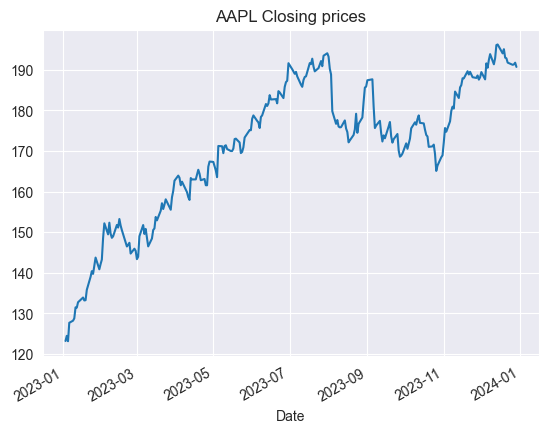

In [12]:
stock_data['Close'].plot(title='AAPL Closing prices')
plt.show()

In [13]:
prices = stock_data['Close']
stock_data["Daily_Return"] = prices.pct_change()
stock_data['Daily_Return']

Date
2023-01-03         NaN
2023-01-04    0.010314
2023-01-05   -0.010605
2023-01-06    0.036794
2023-01-09    0.004089
                ...   
2023-12-22   -0.005548
2023-12-26   -0.002841
2023-12-27    0.000518
2023-12-28    0.002226
2023-12-29   -0.005424
Name: Daily_Return, Length: 250, dtype: float64

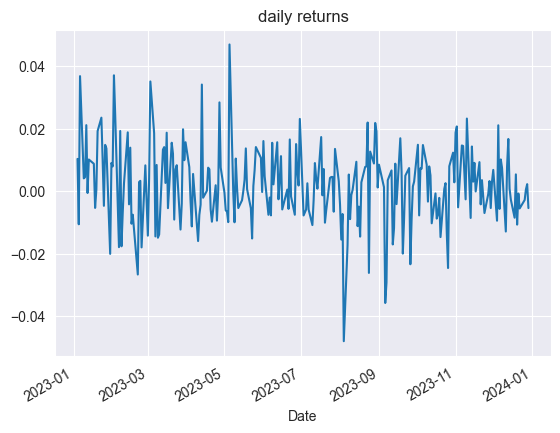

In [14]:
stock_data['Daily_Return'].plot(title='daily returns')
plt.show()

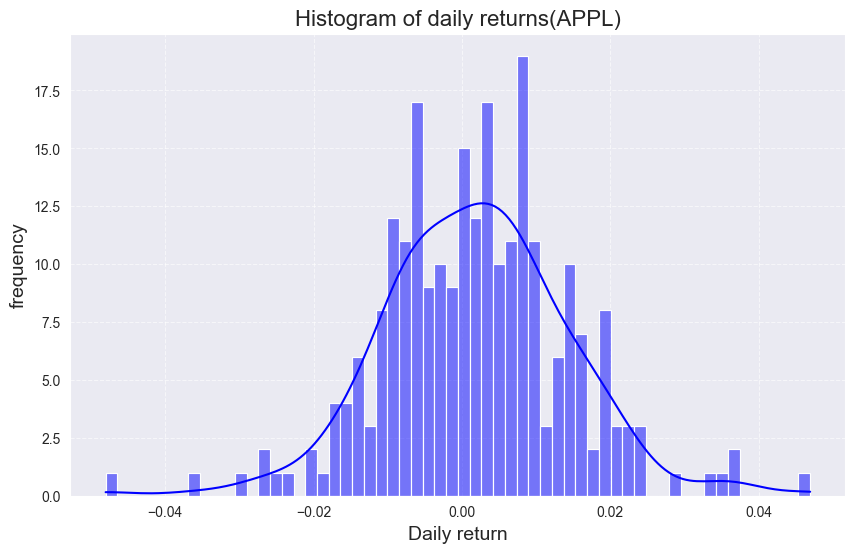

In [15]:
plt.figure(figsize=(10,6))

sns.histplot(stock_data['Daily_Return'],bins=60,kde=True,color='blue')
plt.title('Histogram of daily returns(APPL)',fontsize = 16)
plt.ylabel('frequency',fontsize=14)
plt.xlabel('Daily return',fontsize=14)
plt.grid(True,linestyle="--",alpha=0.6)

plt.show()

In [16]:
stock_data['daily_return'] = stock_data['Close'].pct_change()

In [17]:
daily_returns = stock_data['daily_return'].dropna() 

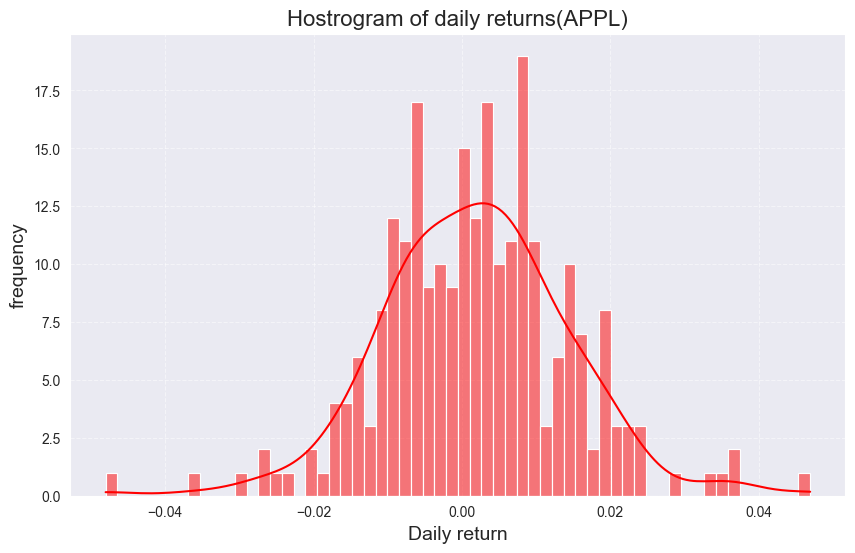

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data=daily_returns,bins=60,kde=True,color='Red')
plt.title('Hostrogram of daily returns(APPL)',fontsize = 16)
plt.ylabel('frequency',fontsize=14)
plt.xlabel('Daily return',fontsize=14)
plt.grid(True,linestyle="--",alpha=0.5)

plt.show()

In [19]:
daily_volatility = daily_returns.std()
daily_volatility

np.float64(0.012570042702602141)

In [20]:
# calculateing daily volatility

annual_volatility = daily_volatility*np.sqrt(252)


In [21]:
print("Daily volatility",daily_volatility)
print("Annual Volatility",annual_volatility)

Daily volatility 0.012570042702602141
Annual Volatility 0.19954324176328503


In [22]:
stock_data = stock_data.drop("Daily_Return",axis=1)

In [23]:
stock_data['Cumulative Returns'] = (1+ stock_data['daily_return']).cumprod()

In [24]:
stock_data

,Close,High,Low,Open,Volume,daily_return,Cumulative Returns
Date,,,,,,,
2023-01-03,123.211205,128.954553,122.324579,128.343772,112117500,NaN,NaN
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600,0.010314,1.010314
2023-01-05,123.161934,125.871063,122.905803,125.240575,80962700,-0.010605,0.999600
2023-01-06,127.693581,128.353621,123.033882,124.137239,87754700,0.036794,1.036380
2023-01-09,128.215714,131.427273,127.959583,128.530965,70790800,0.004089,1.040617
...,...,...,...,...,...,...,...
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,-0.005548,1.556585
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,-0.002841,1.552163
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700,0.000518,1.552967


<Axes: title={'center': '20- day rolling volatility'}, xlabel='Date'>

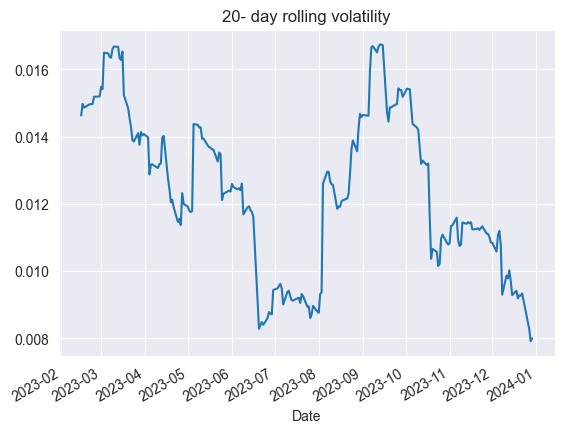

In [25]:
rolling_volatility =  daily_returns.rolling(window=30).std()
rolling_volatility.plot(title='20- day rolling volatility')

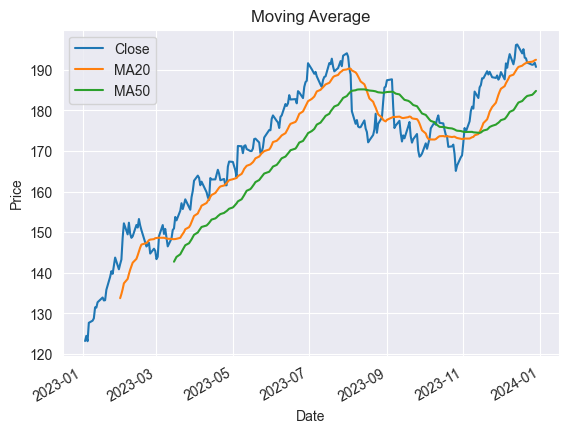

In [26]:
stock_data['MA20']= stock_data['Close'].rolling(20).mean()
stock_data['MA50']= stock_data['Close'].rolling(50).mean()

stock_data[['Close','MA20','MA50']].plot(title='Moving Averages')
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.grid(True)
plt.show()


In [27]:
stock_data['Trend'] = (stock_data['MA20'] > stock_data['MA50']).astype(int)


In [28]:
stock_data

,Close,High,Low,Open,Volume,daily_return,Cumulative Returns,MA20,MA50,Trend
Date,,,,,,,,,,
2023-01-03,123.211205,128.954553,122.324579,128.343772,112117500,NaN,NaN,NaN,NaN,0
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600,0.010314,1.010314,NaN,NaN,0
2023-01-05,123.161934,125.871063,122.905803,125.240575,80962700,-0.010605,0.999600,NaN,NaN,0
2023-01-06,127.693581,128.353621,123.033882,124.137239,87754700,0.036794,1.036380,NaN,NaN,0
2023-01-09,128.215714,131.427273,127.959583,128.530965,70790800,0.004089,1.040617,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,-0.005548,1.556585,191.856623,183.572863,1
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,-0.002841,1.552163,192.018098,183.858868,1
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700,0.000518,1.552967,192.154311,184.149427,1


In [29]:
stock_data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'daily_return',
       'Cumulative Returns', 'MA20', 'MA50', 'Trend'],
      dtype='object')

In [30]:
stock_data['Volume'].head()

Date
2023-01-03    112117500
2023-01-04     89113600
2023-01-05     80962700
2023-01-06     87754700
2023-01-09     70790800
Name: Volume, dtype: int64

In [31]:
stock_data['Volume'].isna().sum()

np.int64(0)

In [32]:
stock_data['Volume'].describe()

count    2.500000e+02
mean     5.922355e+07
std      1.778332e+07
min      2.404830e+07
25%      4.781208e+07
50%      5.511085e+07
75%      6.574292e+07
max      1.543573e+08
Name: Volume, dtype: float64

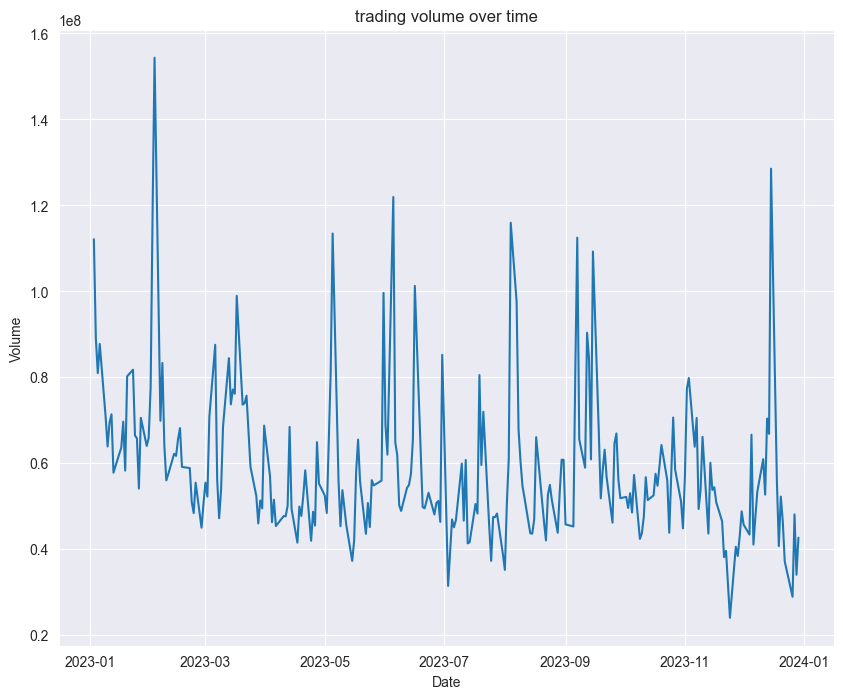

In [33]:
plt.figure(figsize=(10,8))
plt.plot(stock_data.index,stock_data['Volume'])
plt.title('trading volume over time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [34]:
avg_volume = stock_data['Volume'].mean()
high_volume_days = stock_data[stock_data['Volume'] > avg_volume]
high_volume_days.head()

,Close,High,Low,Open,Volume,daily_return,Cumulative Returns,MA20,MA50,Trend
Date,,,,,,,,,,
2023-01-03,123.211205,128.954553,122.324579,128.343772,112117500,NaN,NaN,NaN,NaN,0
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600,0.010314,1.010314,NaN,NaN,0
2023-01-05,123.161934,125.871063,122.905803,125.240575,80962700,-0.010605,0.999600,NaN,NaN,0
2023-01-06,127.693581,128.353621,123.033882,124.137239,87754700,0.036794,1.036380,NaN,NaN,0
2023-01-09,128.215714,131.427273,127.959583,128.530965,70790800,0.004089,1.040617,NaN,NaN,0


In [35]:
stock_data['volume_MA_20']= stock_data['Volume'].rolling(window=20).mean()

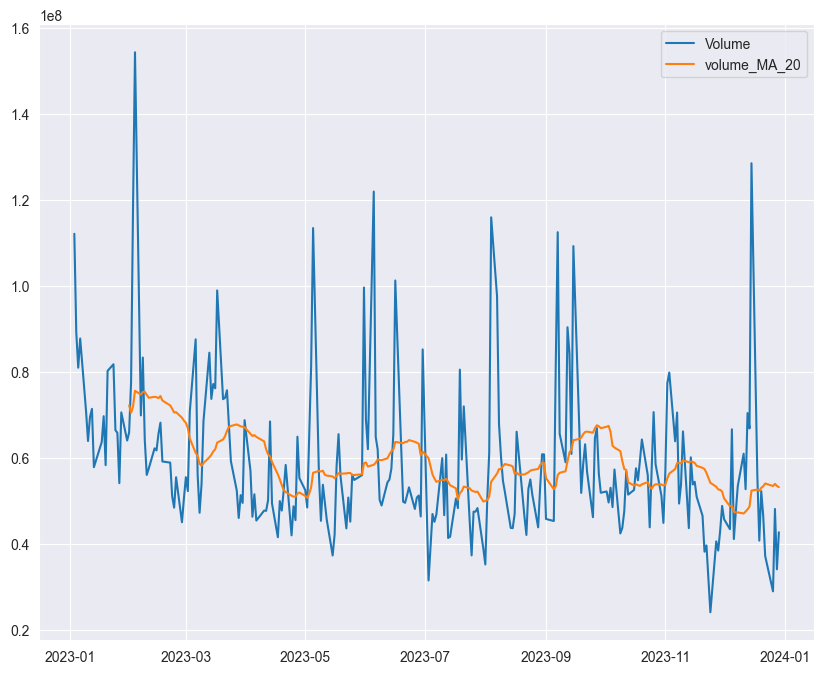

In [36]:
plt.figure(figsize=(10,8))
plt.plot(stock_data.index,stock_data['Volume'],label='Volume')
plt.plot(stock_data.index,stock_data['volume_MA_20'],label='volume_MA_20')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
stock_data[['Volume','Close']].isna().sum()

Volume    0
Close     0
dtype: int64

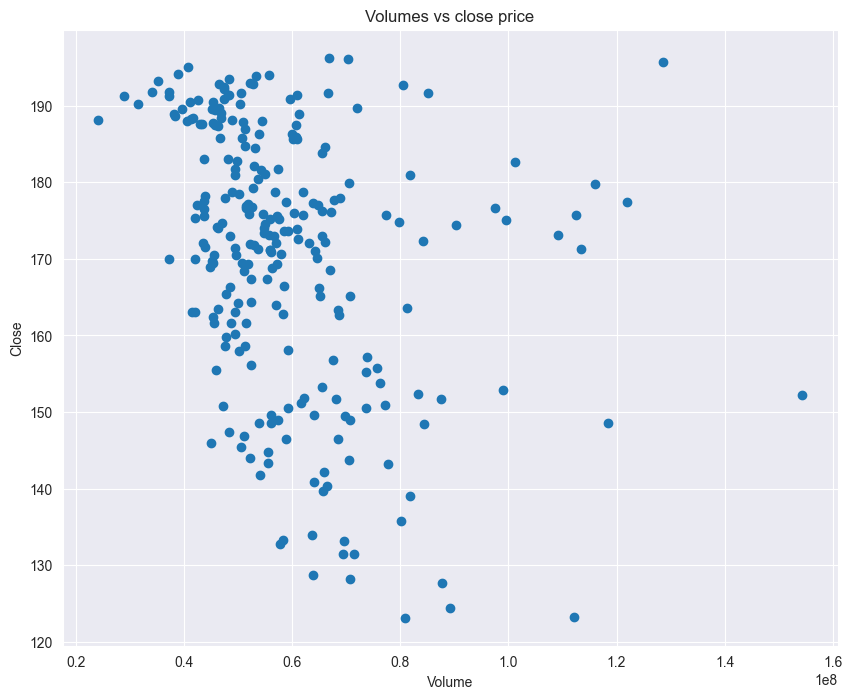

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(stock_data['Volume'],stock_data['Close'])
plt.xlabel('Volume')
plt.ylabel('Close')
plt.title('Volumes vs close price')
plt.grid(True)
plt.show()

In [39]:
stock_data[['Volume','Close']].corr()

,Volume,Close
Volume,1.000000,-0.320673
Close,-0.320673,1.000000


In [40]:
stock_data['daily_price_change'] = stock_data['Close'] - stock_data['Open']
stock_data['daily_price_change']

Date
2023-01-03   -5.132568
2023-01-04   -0.522122
2023-01-05   -2.078642
2023-01-06    3.556341
2023-01-09   -0.315251
                ...   
2023-12-22   -1.565205
2023-12-26   -0.554758
2023-12-27    0.653814
2023-12-28   -0.554758
2023-12-29   -1.357178
Name: daily_price_change, Length: 250, dtype: float64

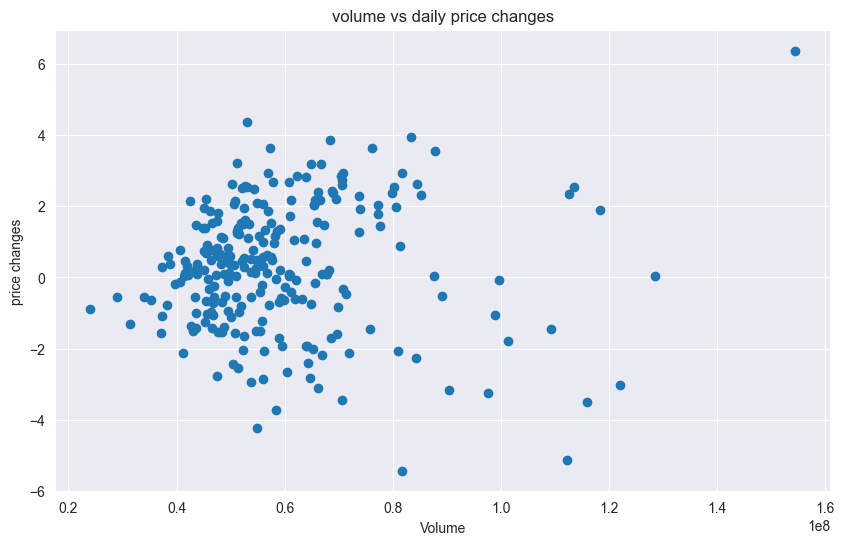

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(stock_data['Volume'],stock_data['daily_price_change'])
plt.xlabel('Volume')
plt.ylabel('price changes')
plt.title('volume vs daily price changes')
plt.grid(True)
plt.show()

In [42]:
volume_threshold = stock_data['Volume'].mean() + 2 * stock_data['Volume'].std()

In [43]:
volume_spikes = stock_data[stock_data['Volume'] > volume_threshold]
volume_spikes[['Close','Volume']].head()

,Close,Volume
Date,,
2023-01-03,123.211205,112117500
2023-02-02,148.578491,118339000
2023-02-03,152.203812,154357300
2023-03-17,152.929535,98944600
2023-05-05,171.251480,113453200


In [44]:
stock_data['High_Volume'] = (stock_data['Volume'] > stock_data['Volume'].mean()).astype(int)


In [45]:
high_vol_days = stock_data[stock_data['High_Volume'] == 1]
normal_days = stock_data[stock_data['High_Volume'] == 0]

In [46]:
stock_data

,Close,High,Low,Open,Volume,daily_return,Cumulative Returns,MA20,MA50,Trend,volume_MA_20,daily_price_change,High_Volume
Date,,,,,,,,,,,,,
2023-01-03,123.211205,128.954553,122.324579,128.343772,112117500,NaN,NaN,NaN,NaN,0,NaN,-5.132568,1
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600,0.010314,1.010314,NaN,NaN,0,NaN,-0.522122,1
2023-01-05,123.161934,125.871063,122.905803,125.240575,80962700,-0.010605,0.999600,NaN,NaN,0,NaN,-2.078642,1
2023-01-06,127.693581,128.353621,123.033882,124.137239,87754700,0.036794,1.036380,NaN,NaN,0,NaN,3.556341,1
2023-01-09,128.215714,131.427273,127.959583,128.530965,70790800,0.004089,1.040617,NaN,NaN,0,NaN,-0.315251,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,-0.005548,1.556585,191.856623,183.572863,1,54011440.0,-1.565205,0
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,-0.002841,1.552163,192.018098,183.858868,1,53429775.0,-0.554758,0
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700,0.000518,1.552967,192.154311,184.149427,1,53913390.0,0.653814,0


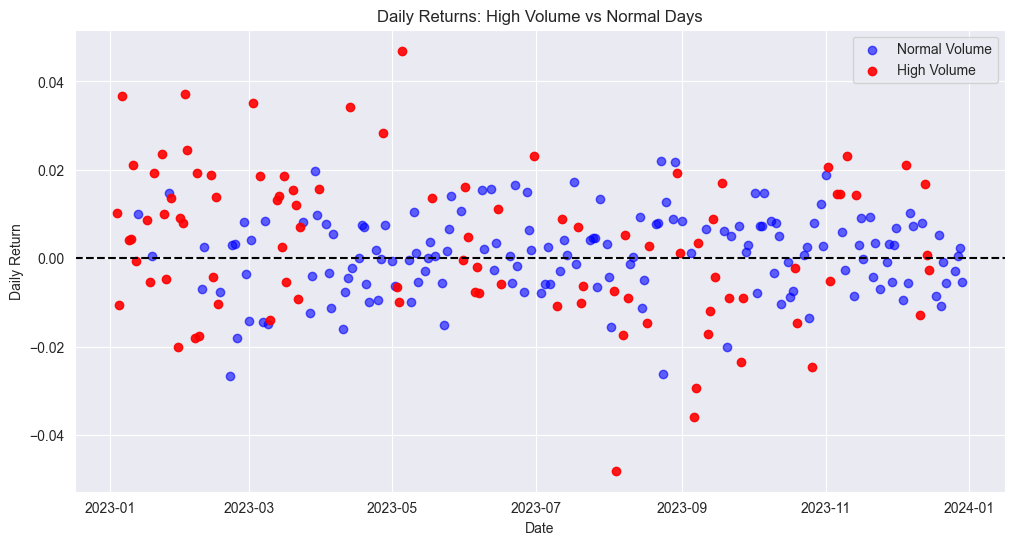

In [47]:
plt.figure(figsize=(12,6))

# Scatter for normal days
plt.scatter(normal_days.index, normal_days['daily_return'], color='blue', label='Normal Volume', alpha=0.6)

# Scatter for high-volume days
plt.scatter(high_vol_days.index, high_vol_days['daily_return'], color='red', label='High Volume', alpha=0.9)

plt.axhline(0, color='black', linestyle='--')  # Zero return line
plt.title('Daily Returns: High Volume vs Normal Days')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


In [48]:
avg_return_normal = normal_days['daily_return'].mean()
avg_return_high = high_vol_days['daily_return'].mean()

volatility_normal = normal_days['daily_return'].std()
volatility_high = high_vol_days['daily_return'].std()

print("Average Return (Normal Days):", round(avg_return_normal, 4))
print("Average Return (High Volume Days):", round(avg_return_high, 4))
print("Volatility (Normal Days):", round(volatility_normal, 4))
print("Volatility (High Volume Days):", round(volatility_high, 4))


Average Return (Normal Days): 0.0008
Average Return (High Volume Days): 0.0035
Volatility (Normal Days): 0.0091
Volatility (High Volume Days): 0.0168


In [49]:
return_threshold = stock_data['daily_return'].std()*2
stock_data['Extreme return'] = (abs(stock_data['daily_return']) > return_threshold).astype(int)

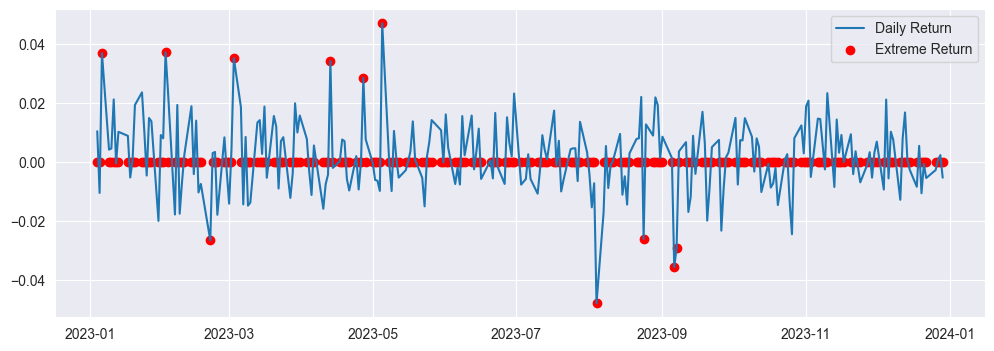

In [50]:
plt.figure(figsize=(12,4))
plt.plot(stock_data.index, stock_data['daily_return'], label='Daily Return')
plt.scatter(stock_data.index, stock_data['daily_return'] * stock_data['Extreme return'], color='red', label='Extreme Return')
plt.legend()
plt.show()


In [51]:
return_threshold_high = stock_data['daily_return'].mean() + 2 * stock_data['daily_return'].std()
return_threshold_low  = stock_data['daily_return'].mean() - 2 * stock_data['daily_return'].std()

In [52]:
stock_data['Extreme_Return'] = ((stock_data['daily_return'] > return_threshold_high) |
                                (stock_data['daily_return'] < return_threshold_low)).astype(int)


In [53]:
stock_data

,Close,High,Low,Open,Volume,daily_return,Cumulative Returns,MA20,MA50,Trend,volume_MA_20,daily_price_change,High_Volume,Extreme return,Extreme_Return
Date,,,,,,,,,,,,,,,
2023-01-03,123.211205,128.954553,122.324579,128.343772,112117500,NaN,NaN,NaN,NaN,0,NaN,-5.132568,1,0,0
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600,0.010314,1.010314,NaN,NaN,0,NaN,-0.522122,1,0,0
2023-01-05,123.161934,125.871063,122.905803,125.240575,80962700,-0.010605,0.999600,NaN,NaN,0,NaN,-2.078642,1,0,0
2023-01-06,127.693581,128.353621,123.033882,124.137239,87754700,0.036794,1.036380,NaN,NaN,0,NaN,3.556341,1,1,1
2023-01-09,128.215714,131.427273,127.959583,128.530965,70790800,0.004089,1.040617,NaN,NaN,0,NaN,-0.315251,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,-0.005548,1.556585,191.856623,183.572863,1,54011440.0,-1.565205,0,0,0
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,-0.002841,1.552163,192.018098,183.858868,1,53429775.0,-0.554758,0,0,0
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700,0.000518,1.552967,192.154311,184.149427,1,53913390.0,0.653814,0,0,0


In [54]:
volume_return_crosstab = pd.crosstab(stock_data['High_Volume'], stock_data['Extreme_Return'])
print(volume_return_crosstab)

Extreme_Return    0   1
High_Volume            
0               154   2
1                83  11


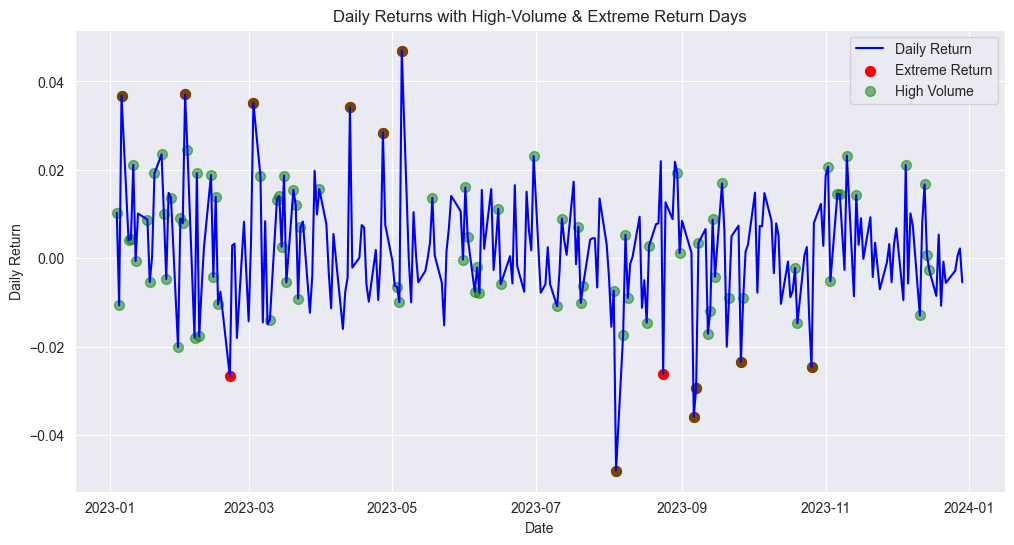

In [55]:
plt.figure(figsize=(12,6))

# Plot daily returns
plt.plot(stock_data.index, stock_data['daily_return'], color='blue', label='Daily Return')

# Highlight extreme returns in red
plt.scatter(
    stock_data.index[stock_data['Extreme_Return']==1],
    stock_data['daily_return'][stock_data['Extreme_Return']==1],
    color='red',
    label='Extreme Return',
    s=50
)

# Highlight high-volume days in green
plt.scatter(
    stock_data.index[stock_data['High_Volume']==1],
    stock_data['daily_return'][stock_data['High_Volume']==1],
    color='green',
    label='High Volume',
    s=50,
    alpha=0.5
)

plt.title('Daily Returns with High-Volume & Extreme Return Days')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


In [56]:
stock_data['Trend'] = (stock_data['MA20']> stock_data['MA50']).astype(int)
stock_data['trend_change'] = stock_data['Trend'].diff()


In [57]:
stock_data

,Close,High,Low,Open,Volume,daily_return,Cumulative Returns,MA20,MA50,Trend,volume_MA_20,daily_price_change,High_Volume,Extreme return,Extreme_Return,trend_change
Date,,,,,,,,,,,,,,,,
2023-01-03,123.211205,128.954553,122.324579,128.343772,112117500,NaN,NaN,NaN,NaN,0,NaN,-5.132568,1,0,0,NaN
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600,0.010314,1.010314,NaN,NaN,0,NaN,-0.522122,1,0,0,0.0
2023-01-05,123.161934,125.871063,122.905803,125.240575,80962700,-0.010605,0.999600,NaN,NaN,0,NaN,-2.078642,1,0,0,0.0
2023-01-06,127.693581,128.353621,123.033882,124.137239,87754700,0.036794,1.036380,NaN,NaN,0,NaN,3.556341,1,1,1,0.0
2023-01-09,128.215714,131.427273,127.959583,128.530965,70790800,0.004089,1.040617,NaN,NaN,0,NaN,-0.315251,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,-0.005548,1.556585,191.856623,183.572863,1,54011440.0,-1.565205,0,0,0,0.0
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,-0.002841,1.552163,192.018098,183.858868,1,53429775.0,-0.554758,0,0,0,0.0
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700,0.000518,1.552967,192.154311,184.149427,1,53913390.0,0.653814,0,0,0,0.0


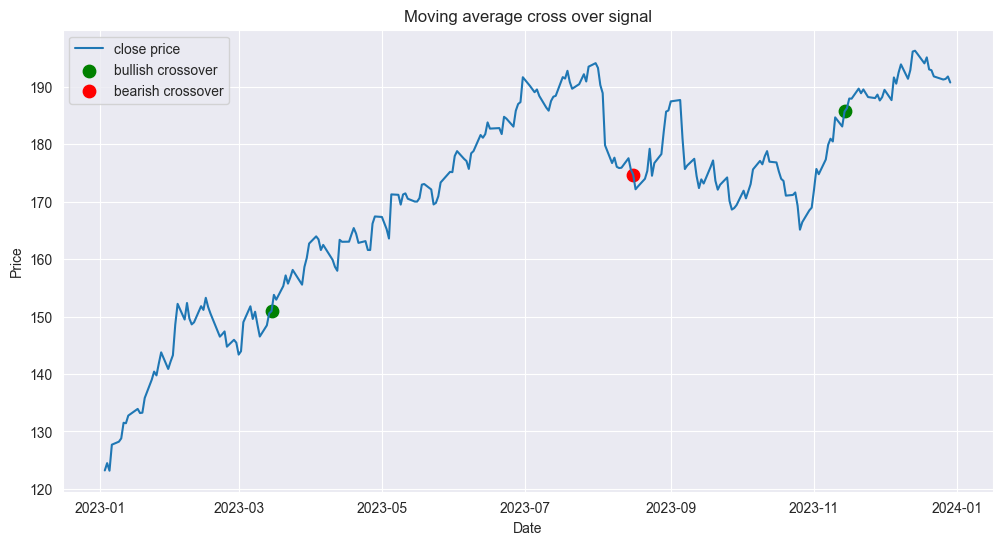

In [58]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index,stock_data['Close'],label='close price')

#bullish crossover
plt.scatter(stock_data.index[stock_data['trend_change']==1],
            stock_data['Close'][stock_data['trend_change']==1],
            color = 'green',
            label='bullish crossover',
            s=80
            )

plt.scatter(stock_data.index[stock_data['trend_change']== -1],
            stock_data['Close'][stock_data['trend_change'] == -1],
            color = 'red',
            label = 'bearish crossover',
            s=80
            )

plt.title('Moving average cross over signal')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
stock_data['Buy_signal'] = ((stock_data['trend_change'] == 1) & (stock_data['High_Volume']==1)).astype(int)

stock_data['Sell_signal'] = ((stock_data['trend_change'] == -1) & (stock_data['High_Volume'] == 1)).astype(int)

In [60]:
stock_data

,Close,High,Low,Open,Volume,daily_return,Cumulative Returns,MA20,MA50,Trend,volume_MA_20,daily_price_change,High_Volume,Extreme return,Extreme_Return,trend_change,Buy_signal,Sell_signal
Date,,,,,,,,,,,,,,,,,,
2023-01-03,123.211205,128.954553,122.324579,128.343772,112117500,NaN,NaN,NaN,NaN,0,NaN,-5.132568,1,0,0,NaN,0,0
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600,0.010314,1.010314,NaN,NaN,0,NaN,-0.522122,1,0,0,0.0,0,0
2023-01-05,123.161934,125.871063,122.905803,125.240575,80962700,-0.010605,0.999600,NaN,NaN,0,NaN,-2.078642,1,0,0,0.0,0,0
2023-01-06,127.693581,128.353621,123.033882,124.137239,87754700,0.036794,1.036380,NaN,NaN,0,NaN,3.556341,1,1,1,0.0,0,0
2023-01-09,128.215714,131.427273,127.959583,128.530965,70790800,0.004089,1.040617,NaN,NaN,0,NaN,-0.315251,1,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,-0.005548,1.556585,191.856623,183.572863,1,54011440.0,-1.565205,0,0,0,0.0,0,0
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,-0.002841,1.552163,192.018098,183.858868,1,53429775.0,-0.554758,0,0,0,0.0,0,0
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700,0.000518,1.552967,192.154311,184.149427,1,53913390.0,0.653814,0,0,0,0.0,0,0


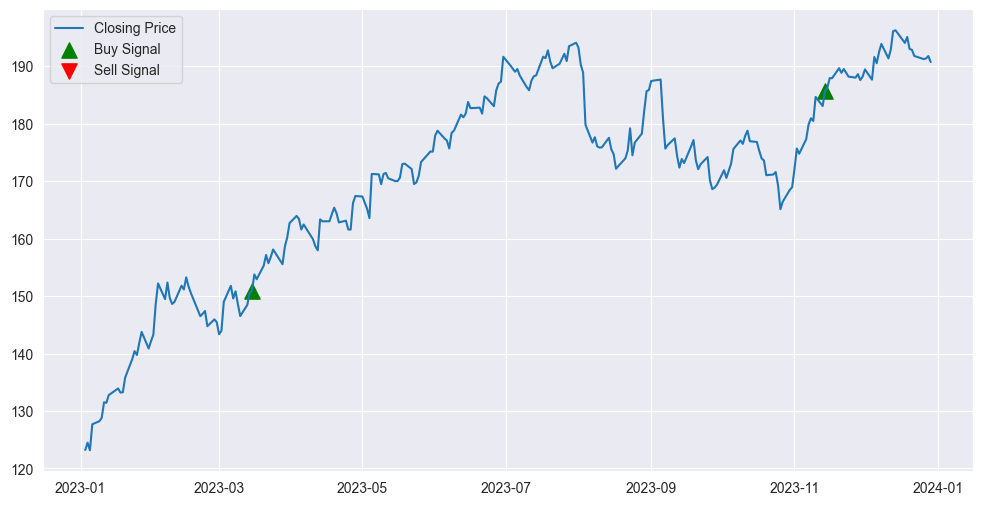

In [61]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data["Close"], label="Closing Price")

# Buy signals
plt.scatter(
    stock_data.index[stock_data['Buy_signal'] == 1],
    stock_data['Close'][stock_data['Buy_signal'] == 1],
    color='green',
    marker='^',
    s=120,
    label='Buy Signal'
)

# Sell signals
plt.scatter(
    stock_data.index[stock_data['Sell_signal'] == 1],
    stock_data['Close'][stock_data['Sell_signal'] == 1],
    color='red',
    marker='v',   # downward triangle for sell
    s=120,
    label='Sell Signal'
)

plt.legend()
plt.grid(True)
plt.show()


In [62]:
stock_data['Buy_signal'] = (stock_data['trend_change'] == 1).astype(int)
stock_data['Sell_signal'] = (stock_data['trend_change'] == -1).astype(int)

stock_data['position'] = 0
stock_data.loc[stock_data['Buy_signal'] == 1, 'position'] = 1
stock_data.loc[stock_data['Sell_signal'] == 1, 'position'] = 0

stock_data['position'] = stock_data['position'].ffill().fillna(0)


In [63]:
stock_data['Market_Return'] = stock_data['daily_return']
stock_data['Strategy_Return'] = stock_data['position'].shift(1) * stock_data['daily_return']

In [64]:
stock_data['Cumulative_Market'] = (1 + stock_data['Market_Return'].fillna(0)).cumprod()
stock_data['Cumulative_Strategy'] = (1+stock_data['Strategy_Return']).cumprod()

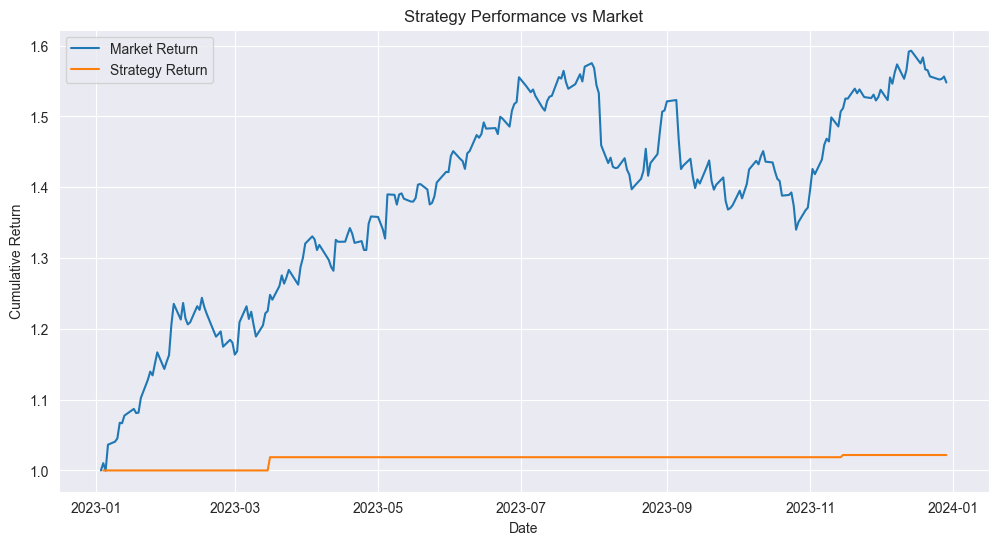

In [65]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Cumulative_Market'], label='Market Return')
plt.plot(stock_data.index, stock_data['Cumulative_Strategy'], label='Strategy Return')

plt.title('Strategy Performance vs Market')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
print(stock_data['Buy_signal'].sum(), stock_data['Sell_signal'].sum())


2 1


In [67]:
print(stock_data[['Buy_signal','Sell_signal','position']].head(20))


            Buy_signal  Sell_signal  position
Date                                         
2023-01-03           0            0         0
2023-01-04           0            0         0
2023-01-05           0            0         0
2023-01-06           0            0         0
2023-01-09           0            0         0
2023-01-10           0            0         0
2023-01-11           0            0         0
2023-01-12           0            0         0
2023-01-13           0            0         0
2023-01-17           0            0         0
2023-01-18           0            0         0
2023-01-19           0            0         0
2023-01-20           0            0         0
2023-01-23           0            0         0
2023-01-24           0            0         0
2023-01-25           0            0         0
2023-01-26           0            0         0
2023-01-27           0            0         0
2023-01-30           0            0         0
2023-01-31           0            

In [68]:
print(stock_data[['Close','MA20','MA50','Trend','trend_change','High_Volume','Buy_signal','Sell_signal','position','daily_return','Strategy_Return']].head(30))


                 Close        MA20  MA50  Trend  trend_change  High_Volume  \
Date                                                                         
2023-01-03  123.211205         NaN   NaN      0           NaN            1   
2023-01-04  124.482040         NaN   NaN      0           0.0            1   
2023-01-05  123.161934         NaN   NaN      0           0.0            1   
2023-01-06  127.693581         NaN   NaN      0           0.0            1   
2023-01-09  128.215714         NaN   NaN      0           0.0            1   
2023-01-10  128.787079         NaN   NaN      0           0.0            1   
2023-01-11  131.506104         NaN   NaN      0           0.0            1   
2023-01-12  131.427277         NaN   NaN      0           0.0            1   
2023-01-13  132.757187         NaN   NaN      0           0.0            0   
2023-01-17  133.919662         NaN   NaN      0           0.0            1   
2023-01-18  133.200500         NaN   NaN      0           0.0   

In [69]:
print("Buy signals:", stock_data['Buy_signal'].sum())
print("Sell signals:", stock_data['Sell_signal'].sum())

Buy signals: 2
Sell signals: 1
